 ##              <font color = green size =10> Housing Advanced Regression Assignment </font>

In [1775]:
#importing libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#supressing  warnings
import warnings
warnings.filterwarnings('ignore')

In [1776]:
#importing data to python notebook
housing = pd.read_csv(r'C:\Users\Sai Srinivas\Downloads\train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## <font color = Violet size = 5>  **data evaluation**</font>

In [1777]:
#shape of the data
housing.shape

(1460, 81)

In [1778]:
housing .columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1779]:
#information of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1780]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1781]:
#display max rows and cols
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',100)

na_vals = 100*(housing.isnull().sum()/len(housing))
print(na_vals.sort_values(ascending = False))

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [1782]:
#checking the data types of the columns
g = housing.columns.to_series().groupby(housing.dtypes).groups
g

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [1783]:
#taking a copy of the main data frame
housing_cop = housing

#preparing a new data frame with object type
housing_obj = housing[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition']]

In [1784]:
#handling na values which are not actually NA
housing_cop['Alley'].fillna('No alley access', inplace = True)

housing_cop['FireplaceQu'].fillna('No Fireplace', inplace = True)

housing_cop['PoolQC'].fillna('No Pool', inplace = True)

housing_cop['Fence'].fillna('No Fence', inplace = True)

housing_cop['GarageFinish'].fillna('No Garage', inplace = True)

housing_cop['GarageType'].fillna('No Garage',inplace = True)

housing_cop['GarageCond'].fillna('No Garage',inplace = True)

housing_cop['GarageQual'].fillna('No Garage',inplace = True)

housing_cop['BsmtExposure'].fillna('No Basement',inplace = True)

housing_cop['BsmtFinType2'].fillna('No Basement',inplace = True)

housing_cop['BsmtFinType1'].fillna('No Basement',inplace = True)

housing_cop['BsmtCond'].fillna('No Basement',inplace = True)

housing_cop['BsmtQual'].fillna('No Basement',inplace = True)

housing_cop['MasVnrType'].fillna('None',inplace = True) 

In [1785]:
#Percentage of missing values
p = 100*(housing_cop.isnull().sum()/len(housing_cop))
print(p.sort_values(ascending = False))

MiscFeature      96.301370
LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
Electrical        0.068493
ExterCond         0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
ExterQual         0.000000
BsmtQual          0.000000
Foundation        0.000000
YearBuilt         0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
TotalBsmtSF       0.000000
Utilities         0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
OverallCond       0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
C

In [1786]:
# dropping the columns which are having missing values greater than 30%
housing_cop.drop(['MiscFeature'],inplace=True,axis=1)
print((100*(housing_cop.isnull().sum()/len(housing_cop))).sort_values(ascending = False))

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
Electrical        0.068493
ExterCond         0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
ExterQual         0.000000
BsmtQual          0.000000
Foundation        0.000000
YearBuilt         0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
TotalBsmtSF       0.000000
Utilities         0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
OverallCond       0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
B

In [1787]:
#skewness of Numerical features:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

skewness = housing_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
YearBuilt         0.612831
BsmtFullBath      0.595454
YearRemodAdd      0.503044
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121222
FullBath          0.036524
Id                0.000000
YrSold           -0.096170
GarageCars       -0.342197
LotFrontage            NaN
MasVnrArea             NaN
G

In [1788]:
housing_cop.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

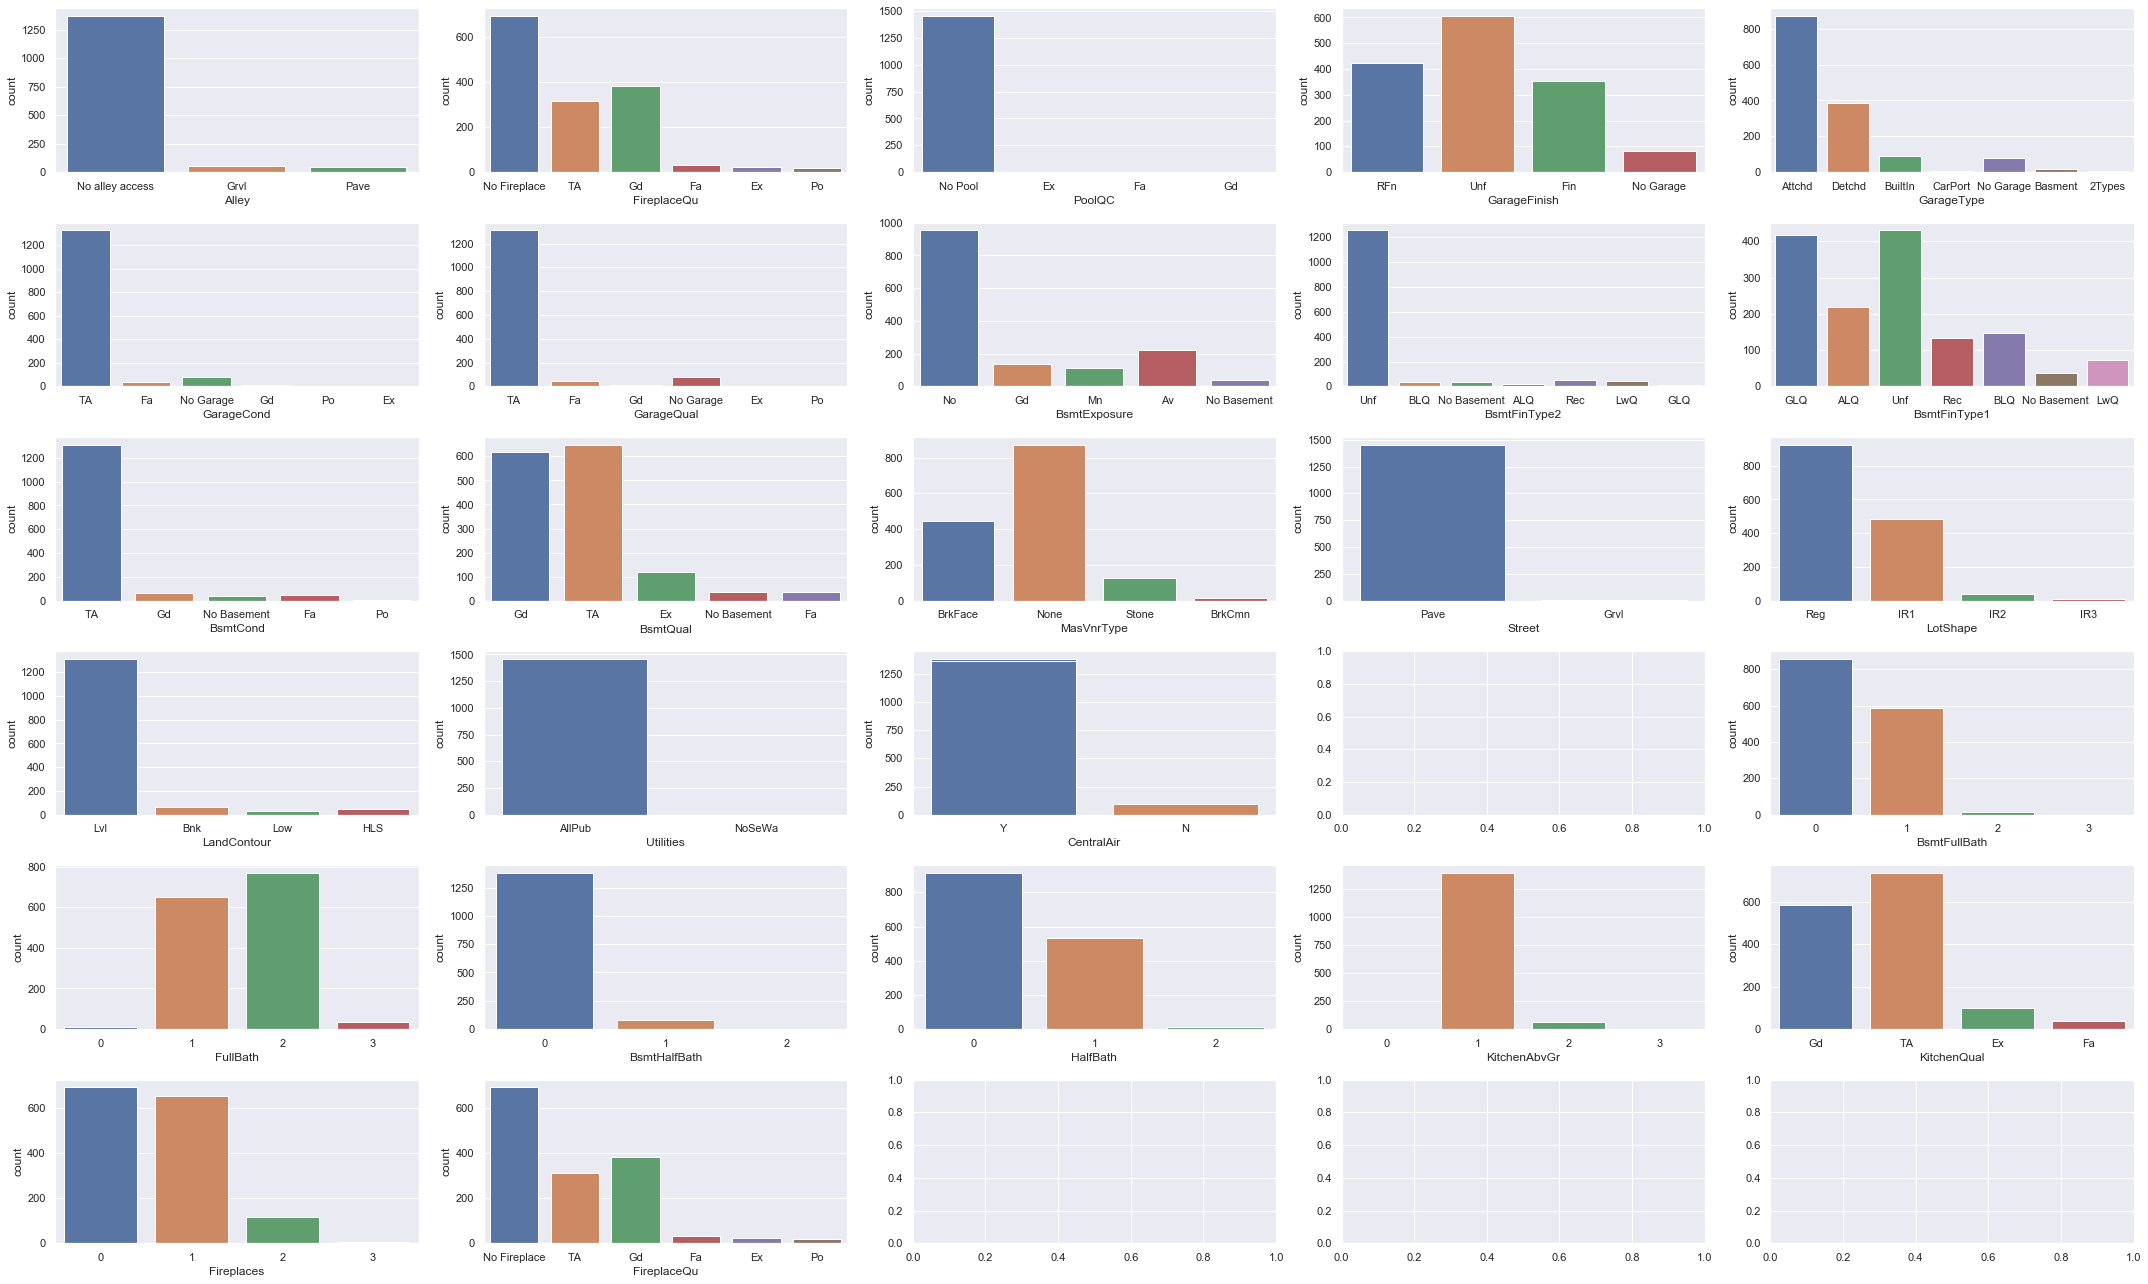

In [1789]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(6,5, figsize = (30,18))
plt1 = sns.countplot(housing_cop['Alley'], ax = axs[0,0])
plt2 = sns.countplot(housing_cop['FireplaceQu'], ax = axs[0,1])
plt3 = sns.countplot(housing_cop['PoolQC'], ax = axs[0,2])
plt4 = sns.countplot(housing_cop['GarageFinish'], ax = axs[0,3])
plt5 = sns.countplot(housing_cop['GarageType'], ax = axs[0,4])
plt6 = sns.countplot(housing_cop['GarageCond'], ax = axs[1,0])
plt7 = sns.countplot(housing_cop['GarageQual'], ax = axs[1,1])
plt8 = sns.countplot(housing_cop['BsmtExposure'], ax = axs[1,2])
plt9 = sns.countplot(housing_cop['BsmtFinType2'], ax = axs[1,3])
plt10 = sns.countplot(housing_cop['BsmtFinType1'], ax = axs[1,4])
plt11 = sns.countplot(housing_cop['BsmtCond'], ax = axs[2,0])
plt12 = sns.countplot(housing_cop['BsmtQual'], ax = axs[2,1])
plt13 = sns.countplot(housing_cop['MasVnrType'], ax = axs[2,2])
plt14 = sns.countplot(housing_cop['Street'], ax = axs[2,3])

plt15 = sns.countplot(housing_cop['LotShape'], ax = axs[2,4])
plt16 = sns.countplot(housing_cop['LandContour'], ax = axs[3,0])
plt17 = sns.countplot(housing_cop['Utilities'], ax = axs[3,1])
plt18 = sns.countplot(housing_cop['LandSlope'], ax = axs[3,2])
plt19 = sns.countplot(housing_cop['CentralAir'], ax = axs[3,2])
plt20 = sns.countplot(housing_cop['BsmtFullBath'], ax = axs[3,4])
plt21 = sns.countplot(housing_cop['FullBath'], ax = axs[4,0])
plt22 = sns.countplot(housing_cop['BsmtHalfBath'], ax = axs[4,1])
plt23 = sns.countplot(housing_cop['HalfBath'], ax = axs[4,2])
plt24= sns.countplot(housing_cop['KitchenAbvGr'], ax = axs[4,3])
plt25 = sns.countplot(housing_cop['KitchenQual'], ax = axs[4,4])
plt26 = sns.countplot(housing_cop['Fireplaces'], ax = axs[5,0])
plt27 = sns.countplot(housing_cop['FireplaceQu'], ax = axs[5,1])

plt.tight_layout()

- we can see the features from the above plot and the value counts that some of the features belongs to a sigle category which is also known as skew data. following are the features:
    1.street
    2.alley
    3.PoolQC
    4.LandContour
    5.Utilities
    6.LandSlope
    7.BsmtCond
    8.CentralAir
    9.BsmtHalfBath
    10.KitchenAbvGr
    11.PavedDrive'

In [1790]:
# Dropping columns that are highly skewed:
housing_cop.drop(['Street','Alley','LandContour','Utilities','LandSlope','BsmtCond','CentralAir','BsmtHalfBath','KitchenAbvGr','PavedDrive','PoolQC','Id'],inplace=True,axis=1)

In [1791]:
#checking for duplicated rows
pd.set_option('display.max_rows',500)
print(housing.duplicated(subset=None, keep='first'))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool


<font color = blue size = 5>  imputing missing values and treating outliers :

In [1792]:
# Filling missing Continuous variables :
housing_cop['LotFrontage'] = housing_cop['LotFrontage'].fillna(housing_cop['LotFrontage'].median())
housing_cop['MasVnrArea'] = housing_cop['MasVnrArea'].fillna(housing_cop['MasVnrArea'].median())
housing_cop['GarageYrBlt'] = housing_cop['GarageYrBlt'].fillna(housing_cop['GarageYrBlt'].median())

In [1793]:
housing_cop.shape

(1460, 68)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


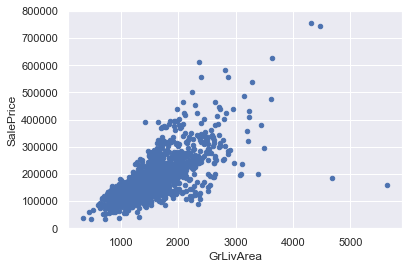

In [1794]:
#scatter plot GrLivArea vs SalePrice
var = 'GrLivArea'
data = pd.concat([housing_cop['SalePrice'], housing_cop[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [1795]:
#Treating outliers
housing_cop = housing_cop.drop(housing_cop[(housing_cop['GrLivArea']>4000) & (housing_cop['SalePrice']<300000)].index).reset_index(drop=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


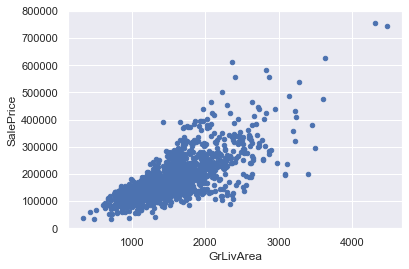

In [1796]:
#scatter plot  after treating outliers 
var = 'GrLivArea'
data = pd.concat([housing_cop['SalePrice'], housing_cop[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

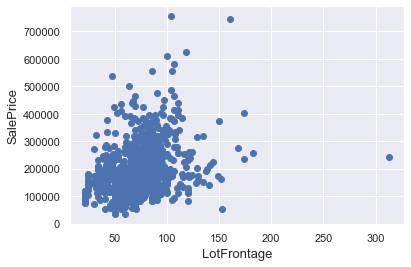

In [1797]:
#scatter plot LotFrontage vs SalePrice
fig, ax = plt.subplots()
ax.scatter(x = housing_cop['LotFrontage'], y = housing_cop['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

In [1798]:
#Treating outliers
housing_cop = housing_cop.drop(housing_cop[(housing_cop['LotFrontage']>300) & (housing_cop['SalePrice']<300000)].index).reset_index(drop=True)

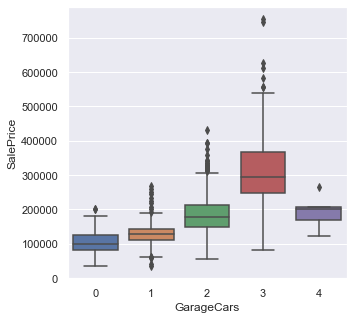

In [1799]:
#GarageCars vs SalePrice 
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x=housing_cop['GarageCars'], y = housing_cop['SalePrice'])

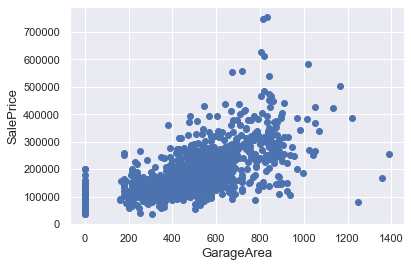

In [1800]:
fig, ax = plt.subplots()
ax.scatter(x = housing_cop['GarageArea'], y = housing_cop['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

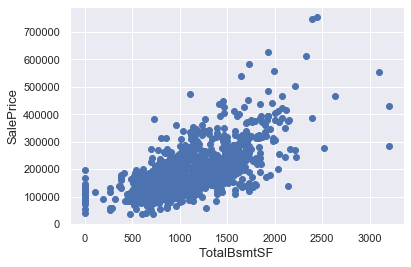

In [1801]:
fig, ax = plt.subplots()
ax.scatter(x = housing_cop['TotalBsmtSF'], y = housing_cop['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

In [1802]:
# changing to no.of years from the action taken in an year
housing_cop['YearBuilt']=2020-housing_cop['YearBuilt']

housing_cop['YearRemodAdd']=2020-housing_cop['YearRemodAdd']

housing_cop['GarageYrBlt']=2020-housing_cop['GarageYrBlt']

housing_cop['YrSold']=2020-housing_cop['YrSold']

housing_cop.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,2,1,3,Gd,8,Typ,0,No Fireplace,Attchd,17.0,RFn,2,548,TA,TA,0,61,0,0,0,0,No Fence,0,2,12,WD,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,1262,0,0,1262,0,2,0,3,TA,6,Typ,1,TA,Attchd,44.0,RFn,2,460,TA,TA,298,0,0,0,0,0,No Fence,0,5,13,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,SBrkr,920,866,0,1786,1,2,1,3,Gd,6,Typ,1,TA,Attchd,19.0,RFn,2,608,TA,TA,0,42,0,0,0,0,No Fence,0,9,12,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,GasA,Gd,SBrkr,961,756,0,1717,1,1,0,3,Gd,7,Typ,1,Gd,Detchd,22.0,Unf,3,642,TA,TA,0,35,272,0,0,0,No Fence,0,2,14,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,SBrkr,1145,1053,0,2198,1,2,1,4,Gd,9,Typ,1,TA,Attchd,20.0,RFn,3,836,TA,TA,192,84,0,0,0,0,No Fence,0,12,12,WD,Normal,250000


In [1803]:
#correlation with Target variables with numerical variables
print((housing_cop[housing_cop.columns[1:]].corr()['SalePrice'][:]).sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.795707
GrLivArea        0.734842
TotalBsmtSF      0.652164
GarageCars       0.641033
1stFlrSF         0.631667
GarageArea       0.629268
FullBath         0.561982
TotRmsAbvGrd     0.537503
MasVnrArea       0.478261
Fireplaces       0.469697
BsmtFinSF1       0.409484
LotFrontage      0.363765
WoodDeckSF       0.325283
OpenPorchSF      0.321637
2ndFlrSF         0.321085
HalfBath         0.285105
LotArea          0.267593
BsmtFullBath     0.228015
BsmtUnfSF        0.215052
BedroomAbvGr     0.167657
ScreenPorch      0.111583
PoolArea         0.099544
MoSold           0.045266
3SsnPorch        0.044639
YrSold           0.028961
BsmtFinSF2      -0.011272
MiscVal         -0.021161
LowQualFinSF    -0.025567
OverallCond     -0.078683
EnclosedPorch   -0.128488
GarageYrBlt     -0.468012
YearRemodAdd    -0.507454
YearBuilt       -0.523935
Name: SalePrice, dtype: float64


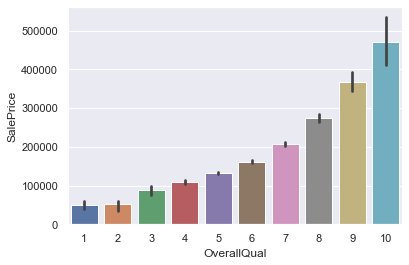

In [1804]:
#barplot of overallqual vs SalePrice 
sns.barplot(housing_cop.OverallQual,housing_cop.SalePrice)

- As the overallquality increases saleprice also increasing which shows a good correlation between these two variables

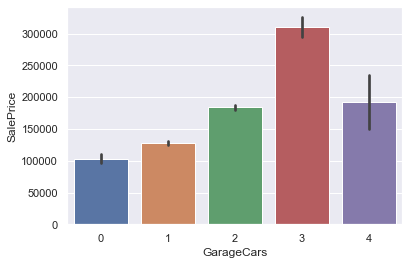

In [1805]:
#barplot of GarageCars vs SalePrice
sns.barplot(housing_cop.GarageCars,housing_cop.SalePrice)

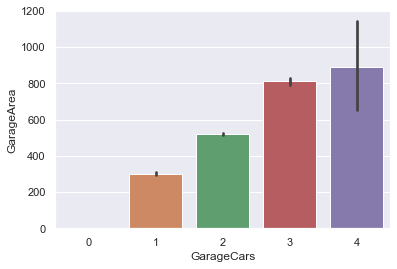

In [1806]:
#barplot of GarageCars vs GarageArea
sns.barplot(housing_cop.GarageCars,housing_cop.GarageArea)

- even when the SalePrice is highly correlated with garage cars and garage area, garage cars and garage area features are highly correlated(we can observe that from the above plot)

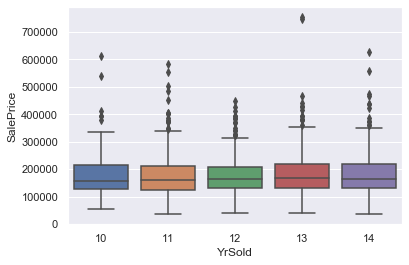

In [1807]:
#year of sold vs SalePrice
sns.boxplot(x="YrSold",y="SalePrice",data=housing_cop);

- there is no big difference saleprice against the years

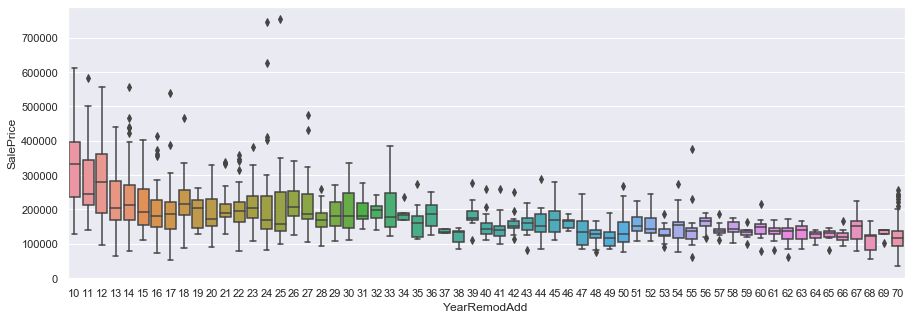

In [1808]:
plt.figure(figsize=(15,5))
sns.boxplot(x="YearRemodAdd",y="SalePrice",data=housing_cop)

- As the remodeled building age increases the saleprice is decreasing which shows negative correlation 

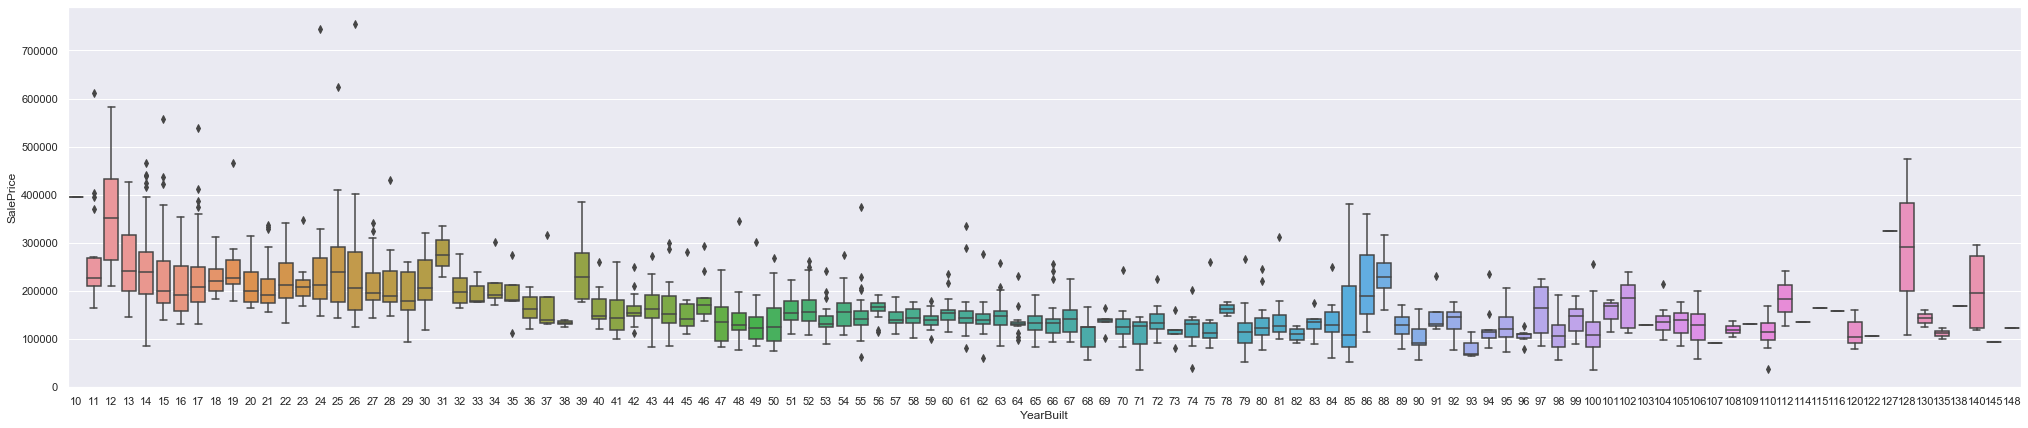

In [1809]:
plt.figure(figsize=(35,7))
sns.boxplot(x="YearBuilt",y="SalePrice",data=housing_cop);

Skewness: 1.883068


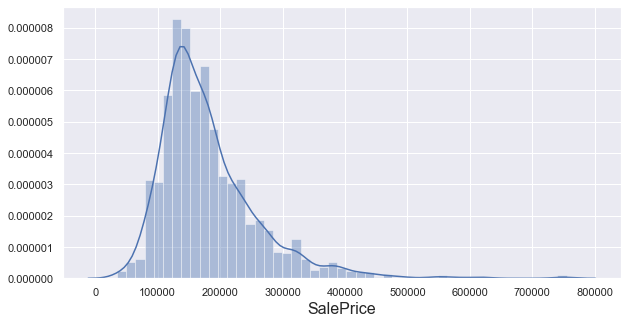

In [1810]:
#check SalePrice distribution
plt.figure(figsize=(10,5));
plt.xlabel('xlabel', fontsize=16);
plt.rc('xtick', labelsize=14); 
plt.rc('ytick', labelsize=14); 


sns.distplot(housing_cop['SalePrice']);
print("Skewness: %f" % housing_cop['SalePrice'].skew())

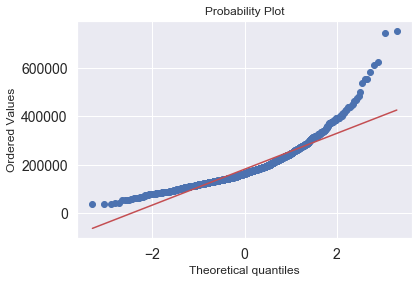

In [1811]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(housing_cop['SalePrice'], plot=plt)
plt.show()

-  The saleprice shows skewness towards left 

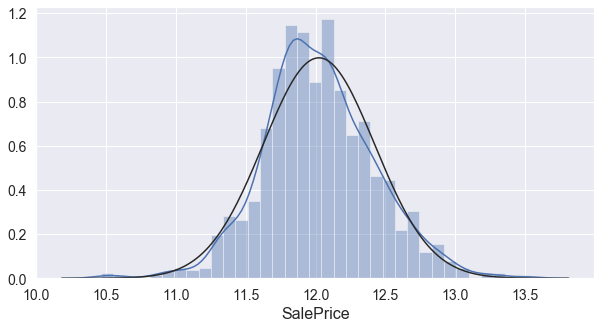

<Figure size 432x288 with 0 Axes>

In [1812]:
#check SalePrice distribution after log transformation
plt.figure(figsize=(10,5));
plt.xlabel('xlabel', fontsize=16);
plt.rc('xtick', labelsize=14); 
plt.rc('ytick', labelsize=14); 

housing_cop["SalePrice"] = np.log1p(housing_cop["SalePrice"])
sns.distplot(housing_cop.SalePrice, fit=norm);
fig = plt.figure()


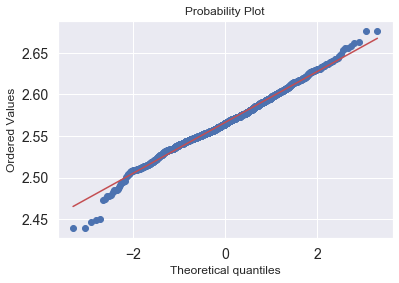

In [1813]:
#probability plot for saleprice
from scipy import stats
fig = plt.figure()
res = stats.probplot(np.log1p(housing_cop['SalePrice']), plot=plt)
plt.show()

In [1814]:
#correlation matrix
housing_cop.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.385717,-0.141174,0.032929,-0.058557,-0.027543,-0.041173,0.023090,-0.074472,-0.065815,-0.141440,-0.254045,-0.261671,0.308344,0.046427,0.077489,0.003964,0.132311,0.177041,-0.022645,0.041302,-0.045664,-0.080931,-0.040072,-0.099724,-0.013136,-0.007086,-0.012220,-0.043895,-0.026174,0.008054,-0.007729,-0.012560,0.021309,-0.073452
LotFrontage,-0.385717,1.000000,0.273591,0.224624,-0.063902,-0.118917,-0.071127,0.163047,0.139962,0.052085,0.144611,0.320440,0.363323,0.069278,0.043439,0.329280,0.062770,0.180406,0.045544,0.247236,0.308069,0.220377,-0.063117,0.287970,0.316108,0.079528,0.116162,0.018037,0.070271,0.046454,0.105792,0.001361,0.010688,-0.005975,0.361238
LotArea,-0.141174,0.273591,1.000000,0.090712,-0.004261,-0.007915,-0.006223,0.084496,0.175541,0.114766,-0.002152,0.225598,0.267132,0.042030,0.005686,0.231948,0.146070,0.118879,0.008283,0.118851,0.173903,0.260756,0.032346,0.152273,0.163667,0.169730,0.062785,-0.016092,0.021524,0.045660,0.036606,0.039218,0.003677,0.013879,0.259776
OverallQual,0.032929,0.224624,0.090712,1.000000,-0.091085,-0.571648,-0.549641,0.399146,0.222514,-0.058204,0.309543,0.539419,0.469020,0.290518,-0.030079,0.589249,0.103576,0.548261,0.270904,0.101055,0.420330,0.392306,-0.513415,0.600709,0.557247,0.237174,0.297601,-0.113035,0.031048,0.066432,0.044794,-0.031203,0.071833,0.026642,0.821351
OverallCond,-0.058557,-0.063902,-0.004261,-0.091085,1.000000,0.375474,-0.073742,-0.123844,-0.042983,0.040311,-0.136030,-0.174115,-0.147251,0.031226,0.025534,-0.078466,-0.054706,-0.194321,-0.059349,0.011894,-0.057214,-0.022953,0.305337,-0.185660,-0.150725,-0.002017,-0.029199,0.070479,0.025543,0.054901,0.002379,0.068843,-0.005264,-0.043698,-0.037673
YearBuilt,-0.027543,-0.118917,-0.007915,-0.571648,0.375474,1.000000,0.592642,-0.308625,-0.249821,0.048760,-0.148651,-0.400172,-0.282472,-0.006768,0.183810,-0.194768,-0.185384,-0.467472,-0.240988,0.070688,-0.091692,-0.145162,0.776738,-0.537424,-0.478064,-0.223562,-0.183975,0.387220,-0.031549,0.050044,0.005187,0.034297,-0.013432,-0.013215,-0.587484
YearRemodAdd,-0.041173,-0.071127,-0.006223,-0.549641,-0.073742,0.592642,1.000000,-0.173099,-0.123111,0.067192,-0.181762,-0.296019,-0.237547,-0.138093,0.062225,-0.286179,-0.116078,-0.437610,-0.182457,0.041937,-0.187509,-0.109508,0.616677,-0.419831,-0.370035,-0.205266,-0.223439,0.193371,-0.045608,0.038176,0.003380,0.010100,-0.020772,0.036058,-0.565697
MasVnrArea,0.023090,0.163047,0.084496,0.399146,-0.123844,-0.308625,-0.173099,1.000000,0.235559,-0.070656,0.113510,0.339322,0.319832,0.165205,-0.068730,0.368982,0.073697,0.268061,0.194651,0.103554,0.268969,0.239520,-0.240592,0.361000,0.360890,0.156565,0.101449,-0.109284,0.019890,0.064161,-0.020378,-0.029383,-0.004332,0.007162,0.431112
BsmtFinSF1,-0.074472,0.139962,0.175541,0.222514,-0.042983,-0.249821,-0.123111,0.235559,1.000000,-0.049630,-0.522476,0.467803,0.395981,-0.164343,-0.066661,0.142279,0.658812,0.047838,-0.009194,-0.115037,0.011063,0.243046,-0.143472,0.229092,0.273250,0.205017,0.072714,-0.103866,0.029175,0.068384,0.052979,0.004739,-0.004247,-0.015770,0.392421
BsmtFinSF2,-0.065815,0.052085,0.114766,-0.058204,0.040311,0.048760,0.067192,-0.070656,-0.049630,1.000000,-0.209501,0.114120,0.104626,-0.098951,0.014737,-0.006923,0.160375,-0.075831,-0.031854,-0.015400,-0.033961,0.048135,0.087473,-0.037854,-0.017078,0.068178,0.004835,0.036338,-0.030066,0.088725,0.046339,0.004888,-0.015035,-0.031646,0.005050


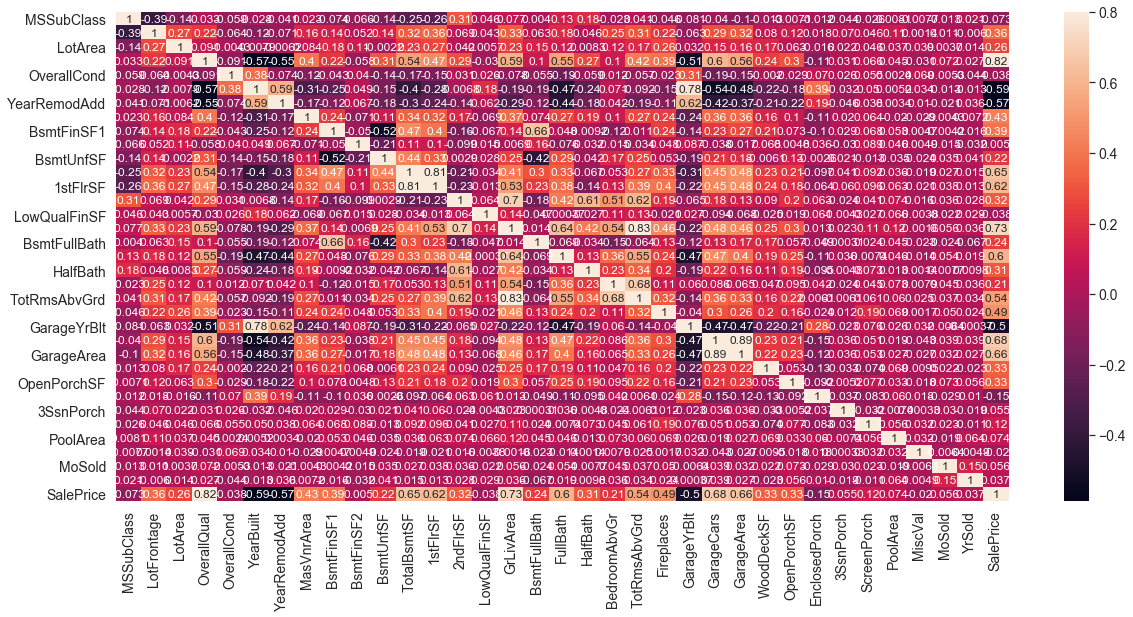

In [1815]:
#correlation plot
corrmat = housing_cop.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

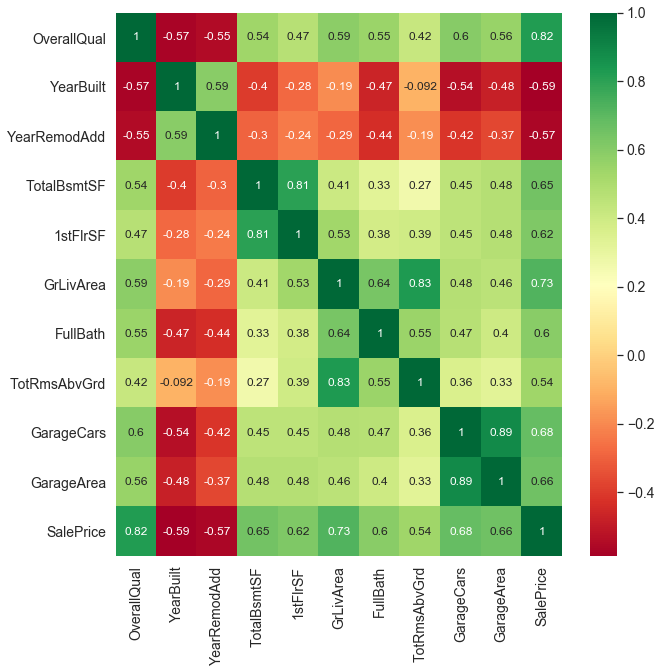

In [1816]:
# features which are highly correlated to the SalePrice
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(housing_cop[top_corr_features].corr(),annot=True,cmap="RdYlGn")

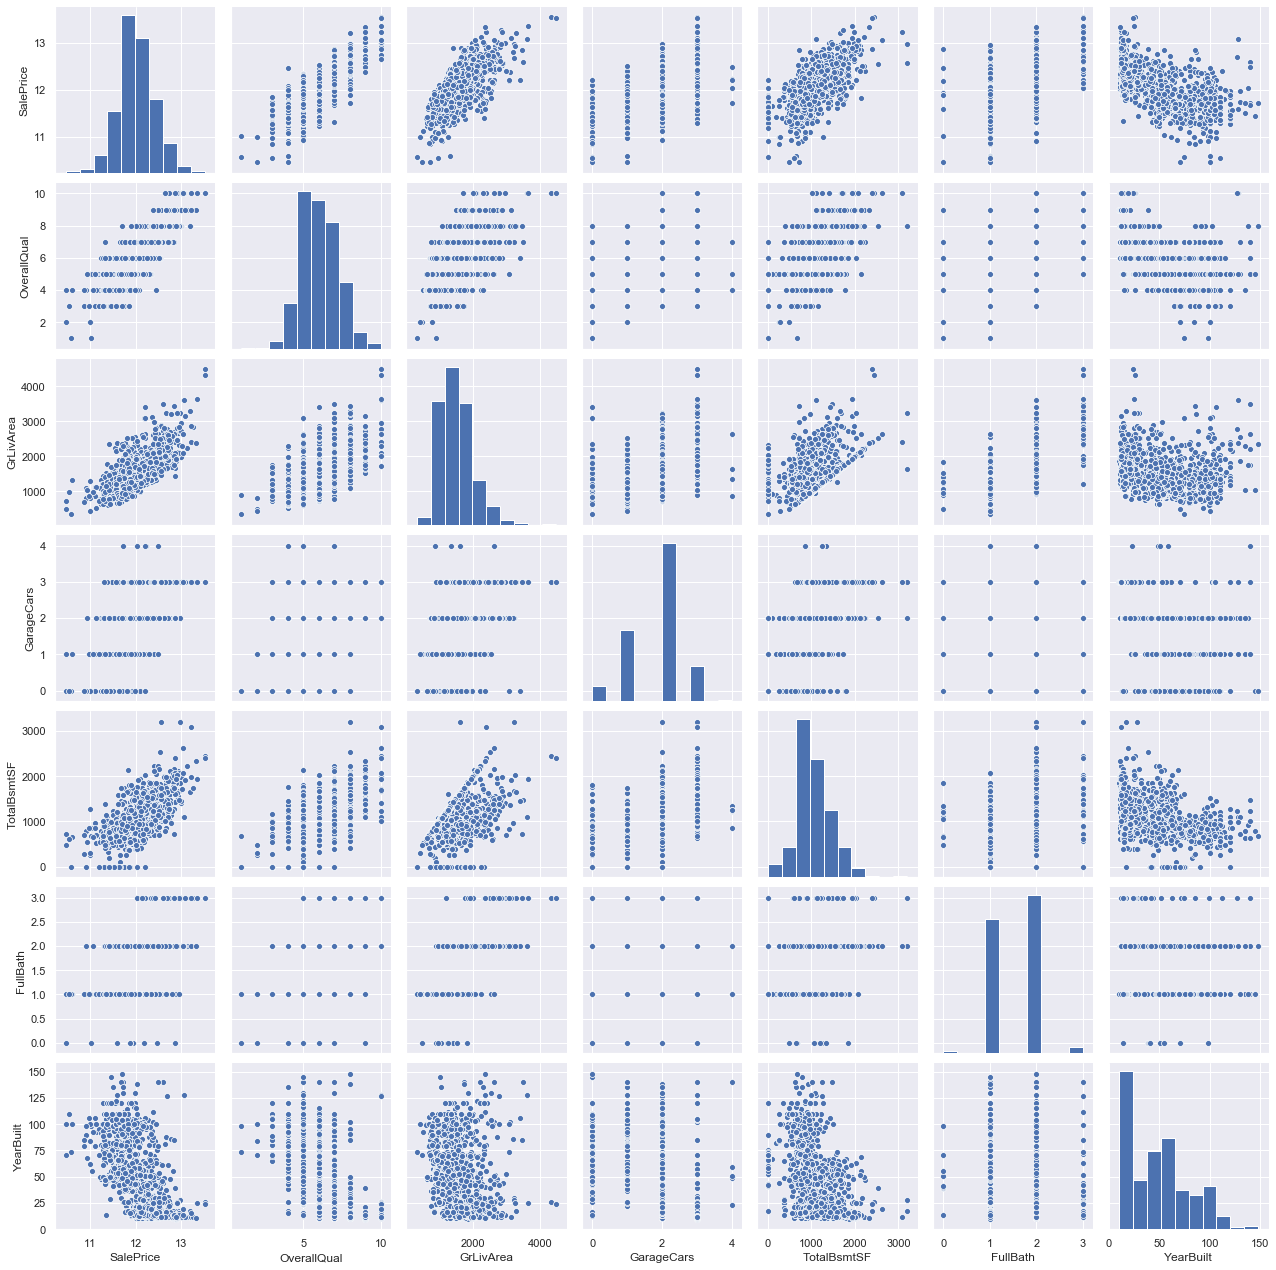

In [1817]:
#scatterplot of highcorrelated features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing_cop[cols], size = 2.5)
plt.show();

In [1818]:
dummy = pd.get_dummies(housing_cop[['MSZoning','LotShape','LotConfig','Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'Fence', 'SaleType', 'SaleCondition']],drop_first=True)

In [1819]:
#concatinating the dummy variables to the main data frame
housing_cop = pd.concat([housing_cop,dummy],axis=1)
housing_cop.shape

(1457, 267)

In [1820]:
#dropping the columns
housing_cop = housing_cop.drop(['MSZoning','LotShape','LotConfig','Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'Fence', 'SaleType', 'SaleCondition'],axis = 1)

In [1821]:
housing_cop.shape

(1457, 234)

In [1822]:
housing_cop.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,17,17,196.0,706,0,150,856,856,854,0,1710,1,2,1,3,8,0,17.0,2,548,0,61,0,0,0,0,0,2,12,12.247699,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,44,44,0.0,978,0,284,1262,1262,0,0,1262,0,2,0,3,6,1,44.0,2,460,298,0,0,0,0,0,0,5,13,12.109016,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,19,18,162.0,486,0,434,920,920,866,0,1786,1,2,1,3,6,1,19.0,2,608,0,42,0,0,0,0,0,9,12,12.317171,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,105,50,0.0,216,0,540,756,961,756,0,1717,1,1,0,3,7,1,22.0,3,642,0,35,272,0,0,0,0,2,14,11.849405,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,20,20,350.0,655,0,490,1145,1145,1053,0,2198,1,2,1,4,9,1,20.0,3,836,192,84,0,0,0,0,0,12,12,12.429220,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1823]:
housing_cop.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

<font color = 'goldyellow' size = 5>  Data preparation :

In [1824]:
#splitting the main data frame to X(independent variables) and y(target variable) 
X = housing_cop.drop(['SalePrice'], axis=1).values
y = housing_cop['SalePrice'].values

In [1825]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1826]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### importing the libraries for running the model

In [1827]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer

### Ridge regression

In [1828]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1829]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08034732211872092


In [1830]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008992,0.000007,0.000998,0.000001,0.0001,{'alpha': 0.0001},-0.085767,-0.079597,-0.084627,-0.090695,-0.100322,-0.088202,0.007012,26,-0.057341,-0.058211,-0.057011,-0.059558,-0.056315,-0.057687,0.001117
1,0.006398,0.000488,0.000599,0.000489,0.001,{'alpha': 0.001},-0.085753,-0.078827,-0.084612,-0.090547,-0.100220,-0.087992,0.007162,25,-0.057343,-0.058256,-0.057015,-0.059566,-0.056321,-0.057700,0.001121
2,0.005998,0.000002,0.000798,0.000399,0.01,{'alpha': 0.01},-0.085604,-0.076921,-0.084463,-0.089465,-0.099575,-0.087205,0.007402,24,-0.057359,-0.058459,-0.057059,-0.059630,-0.056368,-0.057775,0.001147
3,0.006398,0.000487,0.000598,0.000488,0.05,{'alpha': 0.05},-0.084952,-0.076314,-0.084070,-0.087241,-0.098405,-0.086196,0.007126,23,-0.057501,-0.058750,-0.057267,-0.059842,-0.056544,-0.057981,0.001171
4,0.008997,0.001413,0.000999,0.000003,0.1,{'alpha': 0.1},-0.084313,-0.075768,-0.083903,-0.085737,-0.097601,-0.085464,0.007002,22,-0.057706,-0.059032,-0.057530,-0.060117,-0.056783,-0.058233,0.001189


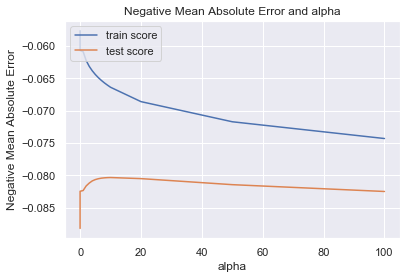

In [1831]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1832]:
#using the optimum alpha and applying to the model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.91115942e-04,  5.35982781e-04,  2.10549540e-06,  5.00071606e-02,
        4.80711745e-02, -2.39346398e-03, -9.07393647e-04,  4.70656273e-06,
        5.78944916e-05,  5.58678092e-05, -9.68282586e-07,  1.12794018e-04,
        8.27622048e-05,  9.90708975e-05,  1.57539500e-06,  1.83408509e-04,
        2.31072402e-02,  2.38926883e-03,  1.64468510e-02, -1.42557252e-03,
        3.80643964e-03,  1.29414018e-02,  1.89266490e-04,  2.25457658e-02,
        7.99959547e-05,  7.13693985e-05,  9.84793972e-05,  1.02545669e-04,
        1.19505014e-04,  2.06518636e-04, -9.02406073e-05, -1.16958184e-06,
       -1.23449323e-03,  6.04690697e-03,  6.15559196e-02,  1.40074149e-02,
        7.03942578e-02,  3.15986501e-02,  3.93233790e-03, -3.62144319e-03,
        4.69716632e-03,  2.64312219e-02, -1.85686882e-02, -1.19191998e-02,
       -1.08149198e-02, -1.11269328e-03, -2.66155136e-02,  9.54634894e-03,
        3.03578312e-02, -6.80298868e-03,  1.00455760e-01, -3.46052070e-02,
       -1.00116518e-02, -

In [1833]:
#predict:
from sklearn.metrics import r2_score
y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train,y_pred=y_train_pred) )
y_test_pred = ridge.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_true=y_test,y_pred=y_test_pred))

R2 score of Training Data: 0.9452686397556161
R2 score of Testing Data: 0.898830963641904


In [1834]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_cop.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,MSSubClass,10.604263
51,Neighborhood_Crawfor,0.100456
37,MSZoning_RL,0.070394
232,SaleCondition_Normal,0.063059
192,Functional_Typ,0.062197
35,MSZoning_FV,0.061556
71,Condition1_Norm,0.059873
67,Neighborhood_StoneBr,0.059622
226,SaleType_New,0.058351
109,Exterior1st_BrkFace,0.051850


### Lasso regression

In [1835]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1836]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150908,0.029608,0.0006,0.00049,0.0001,{'alpha': 0.0001},-0.081008,-0.073706,-0.081211,-0.077481,-0.090517,-0.080785,0.005585,1,-0.060088,-0.061835,-0.060044,-0.062682,-0.059172,-0.060764,0.001291
1,0.020988,0.003739,0.0008,0.00040,0.001,{'alpha': 0.001},-0.073476,-0.079709,-0.077694,-0.082014,-0.092005,-0.080980,0.006186,2,-0.072400,-0.072252,-0.072383,-0.073526,-0.068677,-0.071848,0.001651
2,0.010993,0.000632,0.0006,0.00049,0.01,{'alpha': 0.01},-0.079657,-0.095269,-0.087790,-0.087361,-0.105324,-0.091080,0.008667,3,-0.087419,-0.084602,-0.087255,-0.087687,-0.083437,-0.086080,0.001728
3,0.062564,0.017085,0.0006,0.00049,0.05,{'alpha': 0.05},-0.091970,-0.109463,-0.100879,-0.101037,-0.120155,-0.104701,0.009504,4,-0.102019,-0.098633,-0.100729,-0.101592,-0.097592,-0.100113,0.001717
4,0.039377,0.009681,0.0008,0.00040,0.1,{'alpha': 0.1},-0.097576,-0.115615,-0.105082,-0.105671,-0.124186,-0.109626,0.009267,6,-0.107358,-0.104295,-0.105515,-0.106800,-0.101997,-0.105193,0.001918


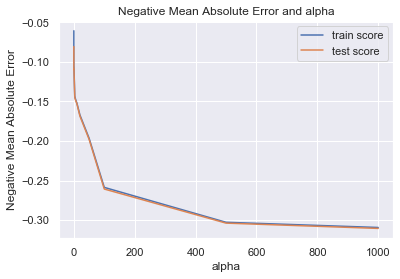

In [1837]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1838]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.08078456448369711


In [1839]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1840]:
lasso.coef_

array([-5.57656649e-04,  5.11609493e-04,  2.03789056e-06,  4.13709189e-02,
        4.53220549e-02, -2.27334645e-03, -9.10601049e-04, -3.34647003e-06,
        1.16915209e-04,  1.15806121e-04,  6.06492821e-05,  4.15049153e-05,
        2.30815983e-04,  2.34249379e-04,  2.13962795e-04,  4.04394026e-05,
        2.28474577e-02, -0.00000000e+00,  1.58941883e-02, -0.00000000e+00,
        4.13050315e-03,  9.63081077e-03,  2.72511193e-04,  2.35810234e-02,
        8.90309096e-05,  6.86805481e-05,  1.11860838e-04,  7.34887919e-05,
        1.71495499e-04,  1.91842780e-04, -4.05591249e-05,  5.37774439e-07,
       -7.85646197e-04,  3.77563855e-03,  3.62712972e-01,  2.96323607e-01,
        3.53101459e-01,  3.20596088e-01,  0.00000000e+00, -0.00000000e+00,
        5.37149771e-03,  2.67373458e-02, -2.97469570e-02, -2.86037994e-02,
       -1.20587820e-02, -0.00000000e+00, -5.78237121e-02,  1.82025787e-03,
        6.11712584e-02, -0.00000000e+00,  1.39118296e-01, -4.44151539e-02,
        2.20740294e-03, -

In [1841]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = housing_cop.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,MSSubClass,10.397893
35,MSZoning_FV,0.362713
226,SaleType_New,0.358208
37,MSZoning_RL,0.353101
38,MSZoning_RM,0.320596
36,MSZoning_RH,0.296324
223,SaleType_ConLD,0.170358
51,Neighborhood_Crawfor,0.139118
67,Neighborhood_StoneBr,0.111456
192,Functional_Typ,0.107058


In [1842]:
from sklearn.metrics import r2_score
y_train_pred = lasso.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train,y_pred=y_train_pred) )
y_test_pred = lasso.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_true=y_test,y_pred=y_test_pred) )

R2 score of Training Data: 0.9544338157467334
R2 score of Testing Data: 0.8921047640675391


### for objective questions

In [1847]:
# doubling the alpha and checking the R2 values
alpha = 2 *10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)

#predict:

y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred) )
y_test_pred = ridge.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_test,y_test_pred) )

R2 score of Training Data: 0.9417207233877203
R2 score of Testing Data: 0.8982835375362523


In [1848]:
#top features when alpha is doubled
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_cop.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,MSSubClass,10.619302
51,Neighborhood_Crawfor,0.077986
232,SaleCondition_Normal,0.054705
4,OverallCond,0.052533
37,MSZoning_RL,0.049321
71,Condition1_Norm,0.048911
5,YearBuilt,0.048869
192,Functional_Typ,0.048089
226,SaleType_New,0.044788
155,BsmtExposure_Gd,0.042032


In [1843]:
alpha = 2*0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1844]:
lasso.coef_

array([-5.09372033e-04,  5.55802126e-04,  2.00691631e-06,  4.60584942e-02,
        4.67516863e-02, -2.30933117e-03, -9.37206424e-04,  3.26330906e-06,
        1.23737780e-04,  1.19493441e-04,  6.49336227e-05,  4.48894100e-05,
        2.26310192e-04,  2.38964060e-04,  1.91776331e-04,  4.15987778e-05,
        2.28545669e-02, -0.00000000e+00,  1.54614395e-02, -0.00000000e+00,
        3.58939368e-03,  1.09736072e-02,  1.85872642e-04,  2.19289043e-02,
        8.41971544e-05,  7.79001602e-05,  1.19802831e-04,  8.27432175e-05,
        1.51362330e-04,  2.06713324e-04, -6.14304119e-05, -3.81090945e-07,
       -1.05109821e-03,  4.56239005e-03,  2.62585791e-01,  1.94633101e-01,
        2.57221761e-01,  2.19624423e-01,  0.00000000e+00, -0.00000000e+00,
        5.24204173e-03,  3.04650808e-02, -1.72200016e-02, -0.00000000e+00,
       -9.89859050e-03, -0.00000000e+00, -3.88503257e-02,  4.61098085e-03,
        4.95620428e-02, -0.00000000e+00,  1.35553163e-01, -3.56176226e-02,
        0.00000000e+00, -

In [1845]:
from sklearn.metrics import r2_score
y_train_pred = lasso.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train,y_pred=y_train_pred) )
y_test_pred = lasso.predict(X_test)
print('R2 score of Testing Data:',r2_score(y_true=y_test,y_pred=y_test_pred) )

R2 score of Training Data: 0.9501740001485462
R2 score of Testing Data: 0.8995878036542645


In [1846]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = housing_cop.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,MSSubClass,10.391565
35,MSZoning_FV,0.262586
37,MSZoning_RL,0.257222
38,MSZoning_RM,0.219624
36,MSZoning_RH,0.194633
51,Neighborhood_Crawfor,0.135553
223,SaleType_ConLD,0.133770
192,Functional_Typ,0.107873
67,Neighborhood_StoneBr,0.100052
226,SaleType_New,0.091606


In [1849]:
#dropping the columns
housing_cop = housing_cop.drop(['MSSubClass','Neighborhood_Crawfor' ,'MSZoning_RL', 'SaleCondition_Normal','Functional_Typ'],axis = 1)

In [1850]:
#splitting the main data frame to X(independent variables) and y(target variable) 
X2 = housing_cop.drop(['SalePrice'], axis=1).values
y2 = housing_cop['SalePrice'].values

In [1851]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1852]:
# split into train and test
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [1853]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X2_train, y2_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1854]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.08376482336849513


In [1855]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008396,0.001356,0.001200,0.000399,0.0001,{'alpha': 0.0001},-0.088961,-0.083961,-0.090728,-0.090957,-0.107862,-0.092494,0.008086,27,-0.062443,-0.062372,-0.060752,-0.063584,-0.059217,-0.061674,0.001524
1,0.007997,0.001093,0.000998,0.000001,0.001,{'alpha': 0.001},-0.088945,-0.083364,-0.090718,-0.090850,-0.107788,-0.092333,0.008192,26,-0.062447,-0.062408,-0.060758,-0.063588,-0.059219,-0.061684,0.001527
2,0.008797,0.000981,0.000997,0.000004,0.01,{'alpha': 0.01},-0.088814,-0.081092,-0.090619,-0.090053,-0.107300,-0.091576,0.008579,25,-0.062486,-0.062589,-0.060812,-0.063644,-0.059259,-0.061758,0.001544
3,0.006995,0.000629,0.000599,0.000489,0.05,{'alpha': 0.05},-0.088293,-0.079658,-0.090187,-0.088362,-0.106065,-0.090513,0.008595,24,-0.062664,-0.062823,-0.061042,-0.063911,-0.059441,-0.061976,0.001564
4,0.006797,0.001471,0.001000,0.000006,0.1,{'alpha': 0.1},-0.087809,-0.079417,-0.089695,-0.087211,-0.104813,-0.089789,0.008293,22,-0.062910,-0.063001,-0.061284,-0.064207,-0.059664,-0.062213,0.001577


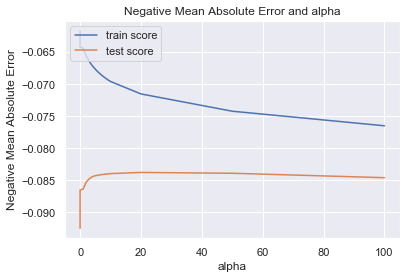

In [1856]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1857]:
#using the optimum alpha and applying to the model
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X2_train, y2_train)
ridge.coef_

array([ 7.17566468e-04,  2.11211552e-06,  5.44937454e-02,  5.34577702e-02,
       -2.44067472e-03, -8.69105828e-04,  7.82532928e-06,  6.47817948e-05,
        5.25003757e-05,  5.91768817e-06,  1.23199859e-04,  7.80618534e-05,
        1.13583805e-04, -1.45727149e-05,  1.77072950e-04,  2.14663265e-02,
       -2.29113713e-04,  1.70646596e-02, -1.65365706e-03,  3.65988485e-03,
        1.83056206e-02,  2.51806674e-04,  1.92557222e-02,  8.82511594e-05,
        6.75821019e-05,  6.60340352e-05,  1.02355922e-04,  1.08493274e-04,
        2.07107977e-04, -1.80013010e-04, -2.66373677e-06, -1.33144885e-03,
        6.60376254e-03,  1.73390063e-02, -1.17108901e-02, -3.57640817e-02,
        5.00080070e-03, -4.41478229e-03, -7.37185016e-04,  2.39640246e-02,
       -9.96542391e-03, -6.28613649e-03, -8.50184735e-03, -6.64023957e-04,
       -2.46046619e-02,  6.98907427e-03,  1.64679496e-02, -4.70342028e-04,
       -3.27189630e-02, -8.24872811e-03, -5.29193725e-02, -3.78647547e-02,
       -1.33437142e-02, -

In [1858]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = housing_cop.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

,Feature,coef
0,LotFrontage,10.645147
3,OverallCond,0.054494
4,YearBuilt,0.053458
68,Condition1_Norm,0.050014
152,BsmtExposure_Gd,0.041742
106,Exterior1st_BrkFace,0.041669
64,Neighborhood_StoneBr,0.036843
144,Foundation_PConc,0.033815
222,SaleType_New,0.033013
63,Neighborhood_Somerst,0.028943


- After removing the top features from the main model of ridge regression the other top five features are 
    1.LotFrontage
    2.OverallCond
    3.YearBuilt
    4.Condition1_Norm
    5.BsmtExposure_Gd